<a href="https://colab.research.google.com/github/FranBot97/Shared-and-Distributed-LSH/blob/main/Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FASTFLOW con single node e readbefore

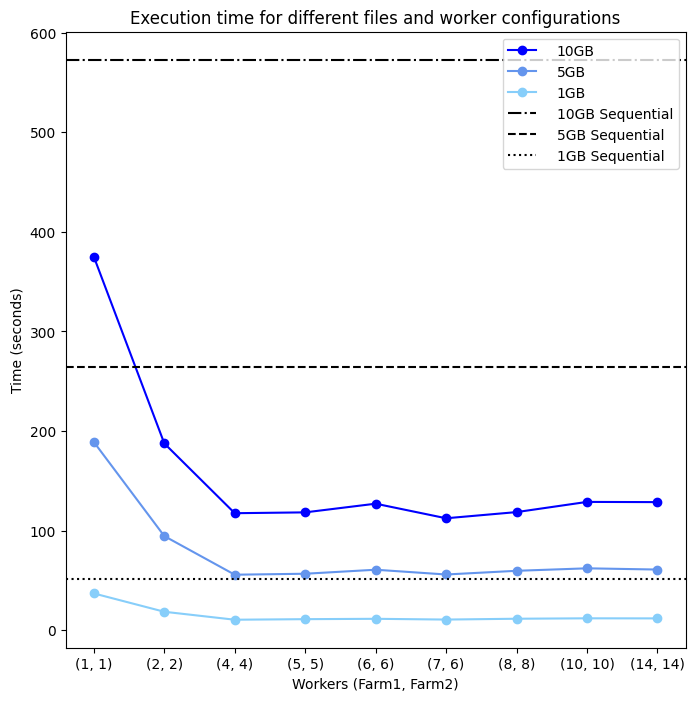

In [ ]:
import matplotlib.pyplot as plt

# Configurazione dei worker (Farm1, Farm2) come stringhe per asse X
workers = [(1,1), (2,2), (4,4), (5,5), (6,6), (7,6), (8,8), (10,10), (14,14)]
worker_labels = [f"{w}" for w in workers]  # Converti in stringhe

# Simulazione dei tempi di esecuzione per diversi file size
execution_time_10GB = [375,187.61, 117.53, 118.37, 127.08,112.45,118.64, 128.87, 128.66]
execution_time_5GB = [189,94.58, 55.79, 56.76, 60.79,56.0, 59.71, 62.20, 60.97]
execution_time_1GB = [37,18.59, 10.60, 11.16, 11.52,10.76, 11.59, 12.01, 11.93]

# Linee orizzontali per il tempo di esecuzione sequenziale
seq_10GB = 572.77
seq_5GB = 264.23
seq_1GB = 51.9

# Creazione della figura
plt.figure(figsize=(8, 8))

# Linee dei risultati paralleli
plt.plot(worker_labels, execution_time_10GB, '-o', label="10GB", color='blue')
plt.plot(worker_labels, execution_time_5GB, '-o', label="5GB", color='cornflowerblue')
plt.plot(worker_labels, execution_time_1GB, '-o', label="1GB", color='lightskyblue')

# Linee tratteggiate per il tempo sequenziale (senza ripetere label nella legenda)
plt.axhline(y=seq_10GB, linestyle='-.', color='black')
plt.axhline(y=seq_5GB, linestyle='--', color='black')
plt.axhline(y=seq_1GB, linestyle=':', color='black')

# Legenda unica con label personalizzati
plt.legend(["10GB", "5GB", "1GB", "10GB Sequential", "5GB Sequential", "1GB Sequential"], handletextpad=1.5)

# Etichette e titolo
plt.xlabel("Workers (Farm1, Farm2)")
plt.ylabel("Time (seconds)")
plt.title("Execution time for different files and worker configurations")

# Imposta le etichette personalizzate per l'asse X
plt.xticks(worker_labels)

# Mostra il grafico
plt.show()


In [ ]:
import pandas as pd

# # Configurazione dei worker (Farm1, Farm2)
# workers = [(2,2), (4,4), (5,5), (6,6), (8,8), (10,10), (14,14)]
# worker_labels = [f"{w}" for w in workers]  # Converti in stringhe

# # Tempi di esecuzione per diversi file size
# execution_time_10GB = [187.61, 117.53, 118.37, 127.08, 118.64, 128.87, 128.66]
# execution_time_5GB = [94.58, 55.79, 56.76, 60.79, 59.71, 62.20, 60.97]
# execution_time_1GB = [18.59, 10.60, 11.16, 11.52, 11.59, 12.01, 11.93]

# # Tempi sequenziali
# seq_10GB = 572.77
# seq_5GB = 264.23
# seq_1GB = 51.9

# Calcolo dello speedup (approssimato a 2 decimali)
speedup_10GB = [round(seq_10GB / t, 2) for t in execution_time_10GB]
speedup_5GB = [round(seq_5GB / t, 2) for t in execution_time_5GB]
speedup_1GB = [round(seq_1GB / t, 2) for t in execution_time_1GB]

ff_best_1GB = (max(speedup_1GB))
ff_best_5GB = (max(speedup_5GB))
ff_best_10GB =(max(speedup_10GB))

efficiency_10GB = [round(t / seq_10GB, 2) for t in execution_time_10GB]
efficiency_5GB = [round(t / seq_5GB, 2) for t in execution_time_5GB]
efficiency_1GB = [round(t / seq_1GB, 2) for t in execution_time_1GB]

# Creazione dei DataFrame
df_10GB = pd.DataFrame({
    "Config": worker_labels,
    "Time (s)": execution_time_10GB,
    "Speedup": speedup_10GB,
})

df_5GB = pd.DataFrame({
    "Configurazione": worker_labels,
    "Tempo Parallelo (s)": execution_time_5GB,
    "Speedup": speedup_5GB
})

df_1GB = pd.DataFrame({
    "Configurazione": worker_labels,
    "Tempo Parallelo (s)": execution_time_1GB,
    "Speedup": speedup_1GB
})

# Visualizzazione delle tabelle
from IPython.display import display

print("📌 Speedup per il file da 10GB")
display(df_10GB)

print("\n📌 Speedup per il file da 5GB")
display(df_5GB)

print("\n📌 Speedup per il file da 1GB")
display(df_1GB)


📌 Speedup per il file da 10GB


,Config,Time (s),Speedup
0,"(1, 1)",375.00,1.53
1,"(2, 2)",187.61,3.05
2,"(4, 4)",117.53,4.87
3,"(5, 5)",118.37,4.84
4,"(6, 6)",127.08,4.51
5,"(7, 6)",112.45,5.09
6,"(8, 8)",118.64,4.83
7,"(10, 10)",128.87,4.44
8,"(14, 14)",128.66,4.45



📌 Speedup per il file da 5GB


,Configurazione,Tempo Parallelo (s),Speedup
0,"(1, 1)",189.00,1.40
1,"(2, 2)",94.58,2.79
2,"(4, 4)",55.79,4.74
3,"(5, 5)",56.76,4.66
4,"(6, 6)",60.79,4.35
5,"(7, 6)",56.00,4.72
6,"(8, 8)",59.71,4.43
7,"(10, 10)",62.20,4.25
8,"(14, 14)",60.97,4.33



📌 Speedup per il file da 1GB


,Configurazione,Tempo Parallelo (s),Speedup
0,"(1, 1)",37.00,1.40
1,"(2, 2)",18.59,2.79
2,"(4, 4)",10.60,4.90
3,"(5, 5)",11.16,4.65
4,"(6, 6)",11.52,4.51
5,"(7, 6)",10.76,4.82
6,"(8, 8)",11.59,4.48
7,"(10, 10)",12.01,4.32
8,"(14, 14)",11.93,4.35


MPI old solution

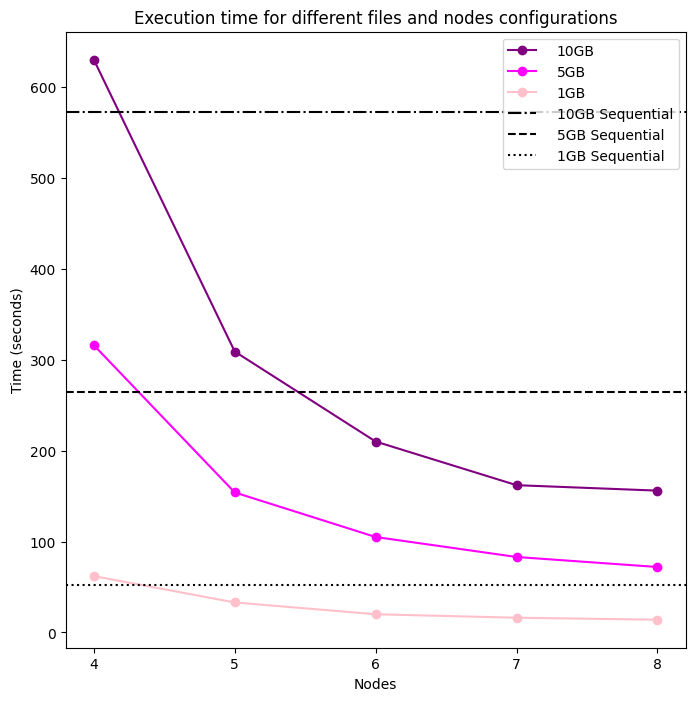

In [ ]:
import matplotlib.pyplot as plt

# Configurazione dei worker (Farm1, Farm2) come stringhe per asse X
nodes = [4,5,6,7,8]
nodes_labes = [f"{n}" for n in nodes]  # Converti in stringhe

# Simulazione dei tempi di esecuzione per diversi file size
execution_time_10GB = [630,309,210,162,156]
execution_time_5GB = [316,154,105,83,72]
execution_time_1GB = [62.00,33.00,20.00,16.2,14.00]

# Linee orizzontali per il tempo di esecuzione sequenziale
seq_10GB = 572.77
seq_5GB = 264.23
seq_1GB = 51.9

# Creazione della figura
plt.figure(figsize=(8, 8))

# Linee dei risultati paralleli
plt.plot(nodes_labes, execution_time_10GB, '-o', label="10GB", color='purple')
plt.plot(nodes_labes, execution_time_5GB, '-o', label="5GB", color='fuchsia')
plt.plot(nodes_labes, execution_time_1GB, '-o', label="1GB", color='pink')

# Linee tratteggiate per il tempo sequenziale (senza ripetere label nella legenda)
plt.axhline(y=seq_10GB, linestyle='-.', color='black')
plt.axhline(y=seq_5GB, linestyle='--', color='black')
plt.axhline(y=seq_1GB, linestyle=':', color='black')

# Legenda unica con label personalizzati
plt.legend(["10GB", "5GB", "1GB", "10GB Sequential", "5GB Sequential", "1GB Sequential"], handletextpad=1.5)

# Etichette e titolo
plt.xlabel("Nodes")
plt.ylabel("Time (seconds)")
plt.title("Execution time for different files and nodes configurations")

# Imposta le etichette personalizzate per l'asse X
plt.xticks(nodes_labes)

# Mostra il grafico
plt.show()


In [ ]:
import pandas as pd

# Configurazione dei nodi
nodes = [4, 5, 6, 7, 8]
nodes_labels = [f"{n}" for n in nodes]  # Converti in stringhe


# Tempi sequenziali
seq_10GB = 572.77
seq_5GB = 264.23
seq_1GB = 51.9

# Calcolo dello speedup (approssimato a 2 decimali)
speedup_10GB = [round(seq_10GB / t, 2) for t in execution_time_10GB]
speedup_5GB = [round(seq_5GB / t, 2) for t in execution_time_5GB]
speedup_1GB = [round(seq_1GB / t, 2) for t in execution_time_1GB]

mpi_best_1GB = (max(speedup_1GB))
mpi_best_5GB = (max(speedup_5GB))
mpi_best_10GB = (max(speedup_10GB))

# Creazione dei DataFrame
df_10GB_nodes = pd.DataFrame({
    "Nodes": nodes_labels,
    "Tempo Parallelo (s)": execution_time_10GB,
    "Speedup": speedup_10GB
})

df_5GB_nodes = pd.DataFrame({
    "Nodes": nodes_labels,
    "Tempo Parallelo (s)": execution_time_5GB,
    "Speedup": speedup_5GB
})

df_1GB_nodes = pd.DataFrame({
    "Nodes": nodes_labels,
    "Tempo Parallelo (s)": execution_time_1GB,
    "Speedup": speedup_1GB
})

# Visualizzazione delle tabelle
from IPython.display import display

print("📌 Speedup per il file da 10GB (Nodes)")
display(df_10GB_nodes)

print("\n📌 Speedup per il file da 5GB (Nodes)")
display(df_5GB_nodes)

print("\n📌 Speedup per il file da 1GB (Nodes)")
display(df_1GB_nodes)


📌 Speedup per il file da 10GB (Nodes)


,Nodes,Tempo Parallelo (s),Speedup
0,4,630,0.91
1,5,309,1.85
2,6,210,2.73
3,7,162,3.54
4,8,156,3.67



📌 Speedup per il file da 5GB (Nodes)


,Nodes,Tempo Parallelo (s),Speedup
0,4,316,0.84
1,5,154,1.72
2,6,105,2.52
3,7,83,3.18
4,8,72,3.67



📌 Speedup per il file da 1GB (Nodes)


,Nodes,Tempo Parallelo (s),Speedup
0,4,62.0,0.84
1,5,33.0,1.57
2,6,20.0,2.59
3,7,16.2,3.20
4,8,14.0,3.71


MPI NUOVA VERSIONE ALL TO ALL

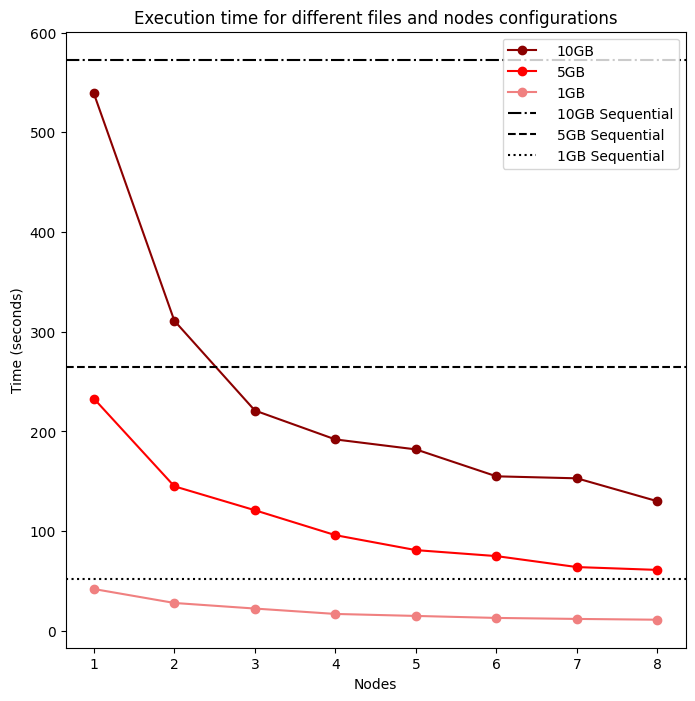

In [ ]:
import matplotlib.pyplot as plt

# Configurazione dei worker (Farm1, Farm2) come stringhe per asse X
nodes_2 = [1,2,3,4,5,6,7,8]
nodes_labels_2 = [f"{n2}" for n2 in nodes_2]  # Converti in stringhe

# Simulazione dei tempi di esecuzione per diversi file size
execution_time_10GB = [539,311,221,192,182,155,153,130]
execution_time_5GB = [233,145,121,96,81,75,64,61.15]
execution_time_1GB = [42,28,22.4,17,15,13,12,11.2]

mpi2_best_1GB = execution_time_1GB.index(min(execution_time_1GB))
mpi2_best_5GB = execution_time_5GB.index(min(execution_time_5GB))
mpi2_best_10GB = execution_time_10GB.index(min(execution_time_10GB))

# Linee orizzontali per il tempo di esecuzione sequenziale
seq_10GB = 572.77
seq_5GB = 264.23
seq_1GB = 51.9

# Creazione della figura
plt.figure(figsize=(8, 8))

# Linee dei risultati paralleli
plt.plot(nodes_labels_2, execution_time_10GB, '-o', label="10GB", color='darkred')
plt.plot(nodes_labels_2, execution_time_5GB, '-o', label="5GB", color='red')
plt.plot(nodes_labels_2, execution_time_1GB, '-o', label="1GB", color='lightcoral')

# Linee tratteggiate per il tempo sequenziale (senza ripetere label nella legenda)
plt.axhline(y=seq_10GB, linestyle='-.', color='black')
plt.axhline(y=seq_5GB, linestyle='--', color='black')
plt.axhline(y=seq_1GB, linestyle=':', color='black')

# Legenda unica con label personalizzati
plt.legend(["10GB", "5GB", "1GB", "10GB Sequential", "5GB Sequential", "1GB Sequential"], handletextpad=1.5)

# Etichette e titolo
plt.xlabel("Nodes")
plt.ylabel("Time (seconds)")
plt.title("Execution time for different files and nodes configurations")


# Imposta le etichette personalizzate per l'asse X
plt.xticks(nodes_labels_2)

# Mostra il grafico
plt.show()


In [ ]:
import pandas as pd

# Configurazione dei nodi
nodes_2 = [1, 2, 3, 4, 5, 6, 7, 8]
nodes_labels_2 = [f"{n}" for n in nodes_2]  # Converti in stringhe

# Tempi sequenziali
seq_10GB = 572.77
seq_5GB = 264.23
seq_1GB = 51.9

# Calcolo dello speedup (approssimato a 2 decimali)
speedup_10GB = [round(seq_10GB / t, 2) for t in execution_time_10GB]
speedup_5GB = [round(seq_5GB / t, 2) for t in execution_time_5GB]
speedup_1GB = [round(seq_1GB / t, 2) for t in execution_time_1GB]

mpi2_best_1GB = (max(speedup_1GB))
mpi2_best_5GB =(max(speedup_5GB))
mpi2_best_10GB = (max(speedup_10GB))

# Creazione dei DataFrame
df_10GB_nodes_2 = pd.DataFrame({
    "Nodes": nodes_labels_2,
    "Tempo Parallelo (s)": execution_time_10GB,
    "Speedup": speedup_10GB
})

df_5GB_nodes_2 = pd.DataFrame({
    "Nodes": nodes_labels_2,
    "Tempo Parallelo (s)": execution_time_5GB,
    "Speedup": speedup_5GB
})

df_1GB_nodes_2 = pd.DataFrame({
    "Nodes": nodes_labels_2,
    "Tempo Parallelo (s)": execution_time_1GB,
    "Speedup": speedup_1GB
})

# Visualizzazione delle tabelle
from IPython.display import display

print("📌 Speedup per il file da 10GB (Nodes 2)")
display(df_10GB_nodes_2)

print("\n📌 Speedup per il file da 5GB (Nodes 2)")
display(df_5GB_nodes_2)

print("\n📌 Speedup per il file da 1GB (Nodes 2)")
display(df_1GB_nodes_2)


📌 Speedup per il file da 10GB (Nodes 2)


,Nodes,Tempo Parallelo (s),Speedup
0,1,539,1.06
1,2,311,1.84
2,3,221,2.59
3,4,192,2.98
4,5,182,3.15
5,6,155,3.70
6,7,153,3.74
7,8,130,4.41



📌 Speedup per il file da 5GB (Nodes 2)


,Nodes,Tempo Parallelo (s),Speedup
0,1,233.00,1.13
1,2,145.00,1.82
2,3,121.00,2.18
3,4,96.00,2.75
4,5,81.00,3.26
5,6,75.00,3.52
6,7,64.00,4.13
7,8,61.15,4.32



📌 Speedup per il file da 1GB (Nodes 2)


,Nodes,Tempo Parallelo (s),Speedup
0,1,42.0,1.24
1,2,28.0,1.85
2,3,22.4,2.32
3,4,17.0,3.05
4,5,15.0,3.46
5,6,13.0,3.99
6,7,12.0,4.33
7,8,11.2,4.63


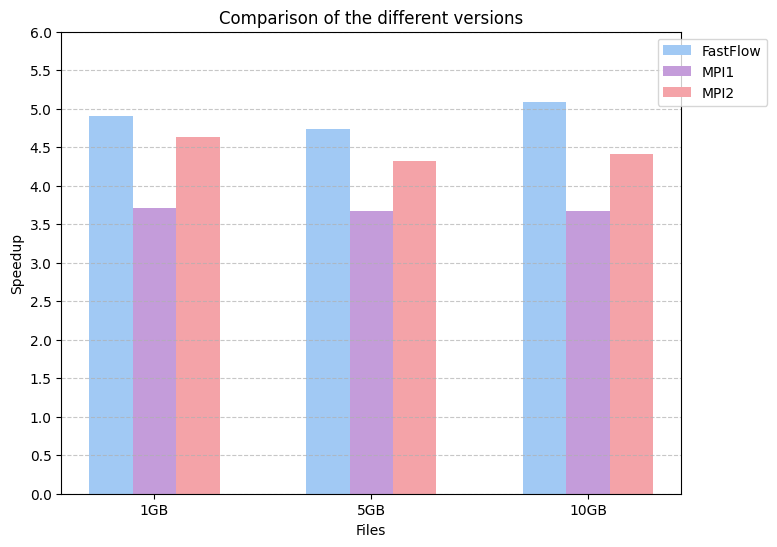

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Valori
labels = ['1GB', '5GB', '10GB']
values_blu = [ff_best_1GB, ff_best_5GB, ff_best_10GB]  # FastFlow
values_viola = [mpi_best_1GB, mpi_best_5GB, mpi_best_10GB]  # MPI1
values_rosso = [mpi2_best_1GB, mpi2_best_5GB, mpi2_best_10GB]  # MPI2

x = np.arange(len(labels))  # Posizioni delle etichette
width = 0.2  # Barre più strette

# Creazione del grafico
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width, values_blu, width, label='FastFlow', color='#A1C9F4')  # Blu pastello
ax.bar(x, values_viola, width, label='MPI1', color='#C49CDA')  # Viola pastello
ax.bar(x + width, values_rosso, width, label='MPI2', color='#F4A3A8')  # Rosso pastello

# Etichette e titolo
ax.set_xlabel('Files')
ax.set_ylabel('Speedup')
ax.set_title('Comparison of the different versions')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Estensione asse Y con griglia ogni 0.5
ax.set_ylim(0, 6)
ax.set_yticks(np.arange(0, 6.5, 0.5))  # Imposta la griglia ogni 0.5

# Aggiunta della griglia
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Sposta la legenda fuori dal grafico
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostra il grafico
plt.show()
